In [1]:
!pip3 install tensorflow==2.0.0

In [3]:
import ssl

import tensorflow as tf
import pandas as pd
import numpy as np

ssl._create_default_https_context = ssl._create_unverified_context

csv_file = tf.keras.utils.get_file('Coinbase_BTCUSD_1h.csv', 'https://www.cryptodatadownload.com/cdd/Coinbase_BTCUSD_1h.csv')
data_frame = pd.read_csv(csv_file, skiprows=1, index_col="Date")

data_frame.index = pd.to_datetime(data_frame.index, format='%Y-%m-%d %I-%p')

data_frame.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2019-08-07 03:00:00,BTCUSD,11622.61,11646.54,11553.83,11590.00,215.39,2498504.56
2019-08-07 02:00:00,BTCUSD,11518.22,11661.59,11518.21,11622.61,746.93,8664734.46
2019-08-07 01:00:00,BTCUSD,11463.01,11568.99,11444.00,11518.22,810.10,9329018.22
2019-08-07 00:00:00,BTCUSD,11465.49,11500.00,11366.26,11463.01,773.39,8845058.20
2019-08-06 23:00:00,BTCUSD,11302.86,11486.55,11187.00,11465.49,992.78,11292526.37


In [4]:
prepared_df = data_frame.drop('Symbol', axis=1)
prepared_df['Date'] = prepared_df.index.values.astype(np.int64) // 10 ** 9
prepared_df = prepared_df.sort_index()

print(prepared_df.head())

train_dataset = tf.data.Dataset.from_tensor_slices(dict(prepared_df))

print([x['Close'].numpy() for x in train_dataset.take(5)])

                        Open     High      Low    Close  Volume BTC  \
Date                                                                  
2017-07-01 11:00:00  2505.56  2513.38  2495.12  2509.17      114.60   
2017-07-01 12:00:00  2509.17  2512.87  2484.99  2488.43      157.36   
2017-07-01 13:00:00  2488.43  2488.43  2454.40  2454.43      280.28   
2017-07-01 14:00:00  2454.43  2473.93  2450.83  2459.35      289.42   
2017-07-01 15:00:00  2459.35  2475.00  2450.00  2467.83      276.82   

                     Volume USD        Date  
Date                                         
2017-07-01 11:00:00   287000.32  1498906800  
2017-07-01 12:00:00   393142.50  1498910400  
2017-07-01 13:00:00   693254.01  1498914000  
2017-07-01 14:00:00   712864.80  1498917600  
2017-07-01 15:00:00   682105.41  1498921200  
[2509.17, 2488.43, 2454.43, 2459.35, 2467.83]


In [5]:
ds_iter = iter(train_dataset)

while True:
    # define the train step
    try:
        batch = next(ds_iter)
        print(batch['Close'])
    except StopIteration:
        break

tf.Tensor(2509.17, shape=(), dtype=float64)
tf.Tensor(2488.43, shape=(), dtype=float64)
tf.Tensor(2454.43, shape=(), dtype=float64)
tf.Tensor(2459.35, shape=(), dtype=float64)
tf.Tensor(2467.83, shape=(), dtype=float64)
tf.Tensor(2460.01, shape=(), dtype=float64)
tf.Tensor(2445.99, shape=(), dtype=float64)
tf.Tensor(2425.94, shape=(), dtype=float64)
tf.Tensor(2435.99, shape=(), dtype=float64)
tf.Tensor(2408.25, shape=(), dtype=float64)
tf.Tensor(2416.62, shape=(), dtype=float64)
tf.Tensor(2424.99, shape=(), dtype=float64)
tf.Tensor(2423.63, shape=(), dtype=float64)
tf.Tensor(2391.87, shape=(), dtype=float64)
tf.Tensor(2409.9, shape=(), dtype=float64)
tf.Tensor(2407.81, shape=(), dtype=float64)
tf.Tensor(2404.99, shape=(), dtype=float64)
tf.Tensor(2412.0, shape=(), dtype=float64)
tf.Tensor(2439.97, shape=(), dtype=float64)
tf.Tensor(2421.55, shape=(), dtype=float64)
tf.Tensor(2431.95, shape=(), dtype=float64)
tf.Tensor(2461.99, shape=(), dtype=float64)
tf.Tensor(2457.54, shape=(), dtype

tf.Tensor(2775.0, shape=(), dtype=float64)
tf.Tensor(2781.2, shape=(), dtype=float64)
tf.Tensor(2771.86, shape=(), dtype=float64)
tf.Tensor(2782.99, shape=(), dtype=float64)
tf.Tensor(2780.21, shape=(), dtype=float64)
tf.Tensor(2805.0, shape=(), dtype=float64)
tf.Tensor(2839.36, shape=(), dtype=float64)
tf.Tensor(2844.83, shape=(), dtype=float64)
tf.Tensor(2847.02, shape=(), dtype=float64)
tf.Tensor(2839.5, shape=(), dtype=float64)
tf.Tensor(2842.0, shape=(), dtype=float64)
tf.Tensor(2848.27, shape=(), dtype=float64)
tf.Tensor(2863.0, shape=(), dtype=float64)
tf.Tensor(2863.6, shape=(), dtype=float64)
tf.Tensor(2848.0, shape=(), dtype=float64)
tf.Tensor(2852.98, shape=(), dtype=float64)
tf.Tensor(2835.76, shape=(), dtype=float64)
tf.Tensor(2826.65, shape=(), dtype=float64)
tf.Tensor(2832.0, shape=(), dtype=float64)
tf.Tensor(2839.0, shape=(), dtype=float64)
tf.Tensor(2861.69, shape=(), dtype=float64)
tf.Tensor(2857.34, shape=(), dtype=float64)
tf.Tensor(2863.19, shape=(), dtype=float64

tf.Tensor(4871.83, shape=(), dtype=float64)
tf.Tensor(4883.69, shape=(), dtype=float64)
tf.Tensor(4869.99, shape=(), dtype=float64)
tf.Tensor(4894.31, shape=(), dtype=float64)
tf.Tensor(4947.99, shape=(), dtype=float64)
tf.Tensor(4931.76, shape=(), dtype=float64)
tf.Tensor(4967.32, shape=(), dtype=float64)
tf.Tensor(4915.19, shape=(), dtype=float64)
tf.Tensor(4830.57, shape=(), dtype=float64)
tf.Tensor(4850.01, shape=(), dtype=float64)
tf.Tensor(4628.11, shape=(), dtype=float64)
tf.Tensor(4768.1, shape=(), dtype=float64)
tf.Tensor(4769.9, shape=(), dtype=float64)
tf.Tensor(4749.64, shape=(), dtype=float64)
tf.Tensor(4698.92, shape=(), dtype=float64)
tf.Tensor(4749.46, shape=(), dtype=float64)
tf.Tensor(4750.65, shape=(), dtype=float64)
tf.Tensor(4700.01, shape=(), dtype=float64)
tf.Tensor(4704.0, shape=(), dtype=float64)
tf.Tensor(4600.0, shape=(), dtype=float64)
tf.Tensor(4588.47, shape=(), dtype=float64)
tf.Tensor(4624.0, shape=(), dtype=float64)
tf.Tensor(4672.61, shape=(), dtype=fl

tf.Tensor(4311.89, shape=(), dtype=float64)
tf.Tensor(4264.37, shape=(), dtype=float64)
tf.Tensor(4245.97, shape=(), dtype=float64)
tf.Tensor(4278.77, shape=(), dtype=float64)
tf.Tensor(4293.75, shape=(), dtype=float64)
tf.Tensor(4282.42, shape=(), dtype=float64)
tf.Tensor(4285.0, shape=(), dtype=float64)
tf.Tensor(4298.0, shape=(), dtype=float64)
tf.Tensor(4274.01, shape=(), dtype=float64)
tf.Tensor(4282.46, shape=(), dtype=float64)
tf.Tensor(4276.19, shape=(), dtype=float64)
tf.Tensor(4294.99, shape=(), dtype=float64)
tf.Tensor(4307.99, shape=(), dtype=float64)
tf.Tensor(4289.99, shape=(), dtype=float64)
tf.Tensor(4300.02, shape=(), dtype=float64)
tf.Tensor(4297.95, shape=(), dtype=float64)
tf.Tensor(4300.35, shape=(), dtype=float64)
tf.Tensor(4308.33, shape=(), dtype=float64)
tf.Tensor(4336.78, shape=(), dtype=float64)
tf.Tensor(4330.01, shape=(), dtype=float64)
tf.Tensor(4330.56, shape=(), dtype=float64)
tf.Tensor(4282.21, shape=(), dtype=float64)
tf.Tensor(4250.01, shape=(), dtype

tf.Tensor(6133.97, shape=(), dtype=float64)
tf.Tensor(6163.0, shape=(), dtype=float64)
tf.Tensor(6168.15, shape=(), dtype=float64)
tf.Tensor(6234.0, shape=(), dtype=float64)
tf.Tensor(6207.66, shape=(), dtype=float64)
tf.Tensor(6347.89, shape=(), dtype=float64)
tf.Tensor(6366.99, shape=(), dtype=float64)
tf.Tensor(6365.68, shape=(), dtype=float64)
tf.Tensor(6380.0, shape=(), dtype=float64)
tf.Tensor(6367.17, shape=(), dtype=float64)
tf.Tensor(6351.51, shape=(), dtype=float64)
tf.Tensor(6345.0, shape=(), dtype=float64)
tf.Tensor(6377.45, shape=(), dtype=float64)
tf.Tensor(6398.77, shape=(), dtype=float64)
tf.Tensor(6389.01, shape=(), dtype=float64)
tf.Tensor(6445.01, shape=(), dtype=float64)
tf.Tensor(6385.02, shape=(), dtype=float64)
tf.Tensor(6420.0, shape=(), dtype=float64)
tf.Tensor(6429.99, shape=(), dtype=float64)
tf.Tensor(6445.0, shape=(), dtype=float64)
tf.Tensor(6371.04, shape=(), dtype=float64)
tf.Tensor(6406.01, shape=(), dtype=float64)
tf.Tensor(6414.17, shape=(), dtype=flo

tf.Tensor(11603.41, shape=(), dtype=float64)
tf.Tensor(11630.0, shape=(), dtype=float64)
tf.Tensor(11789.35, shape=(), dtype=float64)
tf.Tensor(11794.15, shape=(), dtype=float64)
tf.Tensor(11700.0, shape=(), dtype=float64)
tf.Tensor(11676.59, shape=(), dtype=float64)
tf.Tensor(11715.0, shape=(), dtype=float64)
tf.Tensor(11787.31, shape=(), dtype=float64)
tf.Tensor(11771.88, shape=(), dtype=float64)
tf.Tensor(11803.02, shape=(), dtype=float64)
tf.Tensor(11848.99, shape=(), dtype=float64)
tf.Tensor(11700.01, shape=(), dtype=float64)
tf.Tensor(11780.0, shape=(), dtype=float64)
tf.Tensor(11790.0, shape=(), dtype=float64)
tf.Tensor(11791.0, shape=(), dtype=float64)
tf.Tensor(11807.87, shape=(), dtype=float64)
tf.Tensor(11810.1, shape=(), dtype=float64)
tf.Tensor(11780.01, shape=(), dtype=float64)
tf.Tensor(11718.35, shape=(), dtype=float64)
tf.Tensor(11862.99, shape=(), dtype=float64)
tf.Tensor(11964.63, shape=(), dtype=float64)
tf.Tensor(12160.64, shape=(), dtype=float64)
tf.Tensor(12250.0

tf.Tensor(13947.0, shape=(), dtype=float64)
tf.Tensor(13863.13, shape=(), dtype=float64)
tf.Tensor(13586.93, shape=(), dtype=float64)
tf.Tensor(13345.7, shape=(), dtype=float64)
tf.Tensor(13438.0, shape=(), dtype=float64)
tf.Tensor(13474.0, shape=(), dtype=float64)
tf.Tensor(13620.0, shape=(), dtype=float64)
tf.Tensor(13508.01, shape=(), dtype=float64)
tf.Tensor(13797.99, shape=(), dtype=float64)
tf.Tensor(13601.27, shape=(), dtype=float64)
tf.Tensor(13474.97, shape=(), dtype=float64)
tf.Tensor(13596.95, shape=(), dtype=float64)
tf.Tensor(13576.48, shape=(), dtype=float64)
tf.Tensor(13279.99, shape=(), dtype=float64)
tf.Tensor(13234.45, shape=(), dtype=float64)
tf.Tensor(13115.95, shape=(), dtype=float64)
tf.Tensor(13271.98, shape=(), dtype=float64)
tf.Tensor(13255.29, shape=(), dtype=float64)
tf.Tensor(13093.1, shape=(), dtype=float64)
tf.Tensor(13138.11, shape=(), dtype=float64)
tf.Tensor(13189.98, shape=(), dtype=float64)
tf.Tensor(13345.47, shape=(), dtype=float64)
tf.Tensor(13469.

tf.Tensor(10049.98, shape=(), dtype=float64)
tf.Tensor(10049.98, shape=(), dtype=float64)
tf.Tensor(10049.98, shape=(), dtype=float64)
tf.Tensor(10049.98, shape=(), dtype=float64)
tf.Tensor(9851.47, shape=(), dtype=float64)
tf.Tensor(9565.01, shape=(), dtype=float64)
tf.Tensor(9404.95, shape=(), dtype=float64)
tf.Tensor(9481.28, shape=(), dtype=float64)
tf.Tensor(9340.1, shape=(), dtype=float64)
tf.Tensor(9178.48, shape=(), dtype=float64)
tf.Tensor(9329.01, shape=(), dtype=float64)
tf.Tensor(9220.0, shape=(), dtype=float64)
tf.Tensor(8939.01, shape=(), dtype=float64)
tf.Tensor(8982.99, shape=(), dtype=float64)
tf.Tensor(8969.0, shape=(), dtype=float64)
tf.Tensor(8725.0, shape=(), dtype=float64)
tf.Tensor(9100.0, shape=(), dtype=float64)
tf.Tensor(9065.55, shape=(), dtype=float64)
tf.Tensor(8939.98, shape=(), dtype=float64)
tf.Tensor(9010.61, shape=(), dtype=float64)
tf.Tensor(8683.31, shape=(), dtype=float64)
tf.Tensor(8620.99, shape=(), dtype=float64)
tf.Tensor(8844.0, shape=(), dtype

tf.Tensor(11000.0, shape=(), dtype=float64)
tf.Tensor(11069.99, shape=(), dtype=float64)
tf.Tensor(11194.13, shape=(), dtype=float64)
tf.Tensor(11285.62, shape=(), dtype=float64)
tf.Tensor(11290.0, shape=(), dtype=float64)
tf.Tensor(11354.0, shape=(), dtype=float64)
tf.Tensor(11305.04, shape=(), dtype=float64)
tf.Tensor(11313.5, shape=(), dtype=float64)
tf.Tensor(11283.78, shape=(), dtype=float64)
tf.Tensor(11323.01, shape=(), dtype=float64)
tf.Tensor(11290.83, shape=(), dtype=float64)
tf.Tensor(11300.0, shape=(), dtype=float64)
tf.Tensor(11275.0, shape=(), dtype=float64)
tf.Tensor(11386.95, shape=(), dtype=float64)
tf.Tensor(11429.5, shape=(), dtype=float64)
tf.Tensor(11389.0, shape=(), dtype=float64)
tf.Tensor(11453.53, shape=(), dtype=float64)
tf.Tensor(11447.0, shape=(), dtype=float64)
tf.Tensor(11488.89, shape=(), dtype=float64)
tf.Tensor(11465.0, shape=(), dtype=float64)
tf.Tensor(11460.0, shape=(), dtype=float64)
tf.Tensor(11273.18, shape=(), dtype=float64)
tf.Tensor(11298.98, s

tf.Tensor(6816.05, shape=(), dtype=float64)
tf.Tensor(6816.01, shape=(), dtype=float64)
tf.Tensor(6985.0, shape=(), dtype=float64)
tf.Tensor(6939.0, shape=(), dtype=float64)
tf.Tensor(6978.0, shape=(), dtype=float64)
tf.Tensor(6992.01, shape=(), dtype=float64)
tf.Tensor(6884.99, shape=(), dtype=float64)
tf.Tensor(6893.0, shape=(), dtype=float64)
tf.Tensor(6895.0, shape=(), dtype=float64)
tf.Tensor(7059.99, shape=(), dtype=float64)
tf.Tensor(7059.99, shape=(), dtype=float64)
tf.Tensor(7050.0, shape=(), dtype=float64)
tf.Tensor(7064.71, shape=(), dtype=float64)
tf.Tensor(7036.99, shape=(), dtype=float64)
tf.Tensor(7010.01, shape=(), dtype=float64)
tf.Tensor(7013.95, shape=(), dtype=float64)
tf.Tensor(6920.0, shape=(), dtype=float64)
tf.Tensor(7030.0, shape=(), dtype=float64)
tf.Tensor(7013.0, shape=(), dtype=float64)
tf.Tensor(6981.17, shape=(), dtype=float64)
tf.Tensor(6967.91, shape=(), dtype=float64)
tf.Tensor(6979.99, shape=(), dtype=float64)
tf.Tensor(6922.99, shape=(), dtype=float6

tf.Tensor(9255.65, shape=(), dtype=float64)
tf.Tensor(9301.56, shape=(), dtype=float64)
tf.Tensor(9308.19, shape=(), dtype=float64)
tf.Tensor(9301.89, shape=(), dtype=float64)
tf.Tensor(9272.39, shape=(), dtype=float64)
tf.Tensor(9210.0, shape=(), dtype=float64)
tf.Tensor(9179.99, shape=(), dtype=float64)
tf.Tensor(9243.83, shape=(), dtype=float64)
tf.Tensor(8969.0, shape=(), dtype=float64)
tf.Tensor(8995.0, shape=(), dtype=float64)
tf.Tensor(9007.0, shape=(), dtype=float64)
tf.Tensor(8948.6, shape=(), dtype=float64)
tf.Tensor(8981.6, shape=(), dtype=float64)
tf.Tensor(8940.0, shape=(), dtype=float64)
tf.Tensor(8971.25, shape=(), dtype=float64)
tf.Tensor(8974.42, shape=(), dtype=float64)
tf.Tensor(9032.05, shape=(), dtype=float64)
tf.Tensor(9024.61, shape=(), dtype=float64)
tf.Tensor(9020.0, shape=(), dtype=float64)
tf.Tensor(8970.0, shape=(), dtype=float64)
tf.Tensor(8894.0, shape=(), dtype=float64)
tf.Tensor(8914.28, shape=(), dtype=float64)
tf.Tensor(8901.48, shape=(), dtype=float64

tf.Tensor(7489.99, shape=(), dtype=float64)
tf.Tensor(7544.0, shape=(), dtype=float64)
tf.Tensor(7566.05, shape=(), dtype=float64)
tf.Tensor(7582.94, shape=(), dtype=float64)
tf.Tensor(7538.02, shape=(), dtype=float64)
tf.Tensor(7546.0, shape=(), dtype=float64)
tf.Tensor(7351.02, shape=(), dtype=float64)
tf.Tensor(7399.54, shape=(), dtype=float64)
tf.Tensor(7415.0, shape=(), dtype=float64)
tf.Tensor(7425.0, shape=(), dtype=float64)
tf.Tensor(7438.36, shape=(), dtype=float64)
tf.Tensor(7439.1, shape=(), dtype=float64)
tf.Tensor(7424.95, shape=(), dtype=float64)
tf.Tensor(7397.99, shape=(), dtype=float64)
tf.Tensor(7439.3, shape=(), dtype=float64)
tf.Tensor(7432.41, shape=(), dtype=float64)
tf.Tensor(7432.05, shape=(), dtype=float64)
tf.Tensor(7504.19, shape=(), dtype=float64)
tf.Tensor(7514.32, shape=(), dtype=float64)
tf.Tensor(7468.74, shape=(), dtype=float64)
tf.Tensor(7489.75, shape=(), dtype=float64)
tf.Tensor(7487.01, shape=(), dtype=float64)
tf.Tensor(7482.66, shape=(), dtype=flo

tf.Tensor(6085.6, shape=(), dtype=float64)
tf.Tensor(6044.62, shape=(), dtype=float64)
tf.Tensor(5922.41, shape=(), dtype=float64)
tf.Tensor(5943.52, shape=(), dtype=float64)
tf.Tensor(5851.66, shape=(), dtype=float64)
tf.Tensor(5888.75, shape=(), dtype=float64)
tf.Tensor(5873.92, shape=(), dtype=float64)
tf.Tensor(5865.02, shape=(), dtype=float64)
tf.Tensor(5878.8, shape=(), dtype=float64)
tf.Tensor(5855.21, shape=(), dtype=float64)
tf.Tensor(5895.0, shape=(), dtype=float64)
tf.Tensor(5876.57, shape=(), dtype=float64)
tf.Tensor(5891.77, shape=(), dtype=float64)
tf.Tensor(5895.22, shape=(), dtype=float64)
tf.Tensor(5916.65, shape=(), dtype=float64)
tf.Tensor(5885.0, shape=(), dtype=float64)
tf.Tensor(5869.48, shape=(), dtype=float64)
tf.Tensor(5858.75, shape=(), dtype=float64)
tf.Tensor(5856.99, shape=(), dtype=float64)
tf.Tensor(5901.18, shape=(), dtype=float64)
tf.Tensor(5898.15, shape=(), dtype=float64)
tf.Tensor(5872.7, shape=(), dtype=float64)
tf.Tensor(5889.99, shape=(), dtype=fl

tf.Tensor(8170.01, shape=(), dtype=float64)
tf.Tensor(8125.07, shape=(), dtype=float64)
tf.Tensor(8110.0, shape=(), dtype=float64)
tf.Tensor(8116.0, shape=(), dtype=float64)
tf.Tensor(8112.61, shape=(), dtype=float64)
tf.Tensor(8113.67, shape=(), dtype=float64)
tf.Tensor(8119.63, shape=(), dtype=float64)
tf.Tensor(8122.49, shape=(), dtype=float64)
tf.Tensor(8110.21, shape=(), dtype=float64)
tf.Tensor(8020.08, shape=(), dtype=float64)
tf.Tensor(8004.72, shape=(), dtype=float64)
tf.Tensor(7942.67, shape=(), dtype=float64)
tf.Tensor(7975.49, shape=(), dtype=float64)
tf.Tensor(7797.01, shape=(), dtype=float64)
tf.Tensor(7725.0, shape=(), dtype=float64)
tf.Tensor(7730.0, shape=(), dtype=float64)
tf.Tensor(7750.99, shape=(), dtype=float64)
tf.Tensor(7790.0, shape=(), dtype=float64)
tf.Tensor(7725.0, shape=(), dtype=float64)
tf.Tensor(7739.99, shape=(), dtype=float64)
tf.Tensor(7750.01, shape=(), dtype=float64)
tf.Tensor(7689.98, shape=(), dtype=float64)
tf.Tensor(7706.44, shape=(), dtype=flo

tf.Tensor(7104.99, shape=(), dtype=float64)
tf.Tensor(7086.48, shape=(), dtype=float64)
tf.Tensor(7081.23, shape=(), dtype=float64)
tf.Tensor(7092.83, shape=(), dtype=float64)
tf.Tensor(7095.71, shape=(), dtype=float64)
tf.Tensor(7078.01, shape=(), dtype=float64)
tf.Tensor(6973.0, shape=(), dtype=float64)
tf.Tensor(6991.17, shape=(), dtype=float64)
tf.Tensor(7021.0, shape=(), dtype=float64)
tf.Tensor(7010.01, shape=(), dtype=float64)
tf.Tensor(7000.01, shape=(), dtype=float64)
tf.Tensor(7039.0, shape=(), dtype=float64)
tf.Tensor(7057.78, shape=(), dtype=float64)
tf.Tensor(7054.39, shape=(), dtype=float64)
tf.Tensor(7030.9, shape=(), dtype=float64)
tf.Tensor(7048.01, shape=(), dtype=float64)
tf.Tensor(7040.0, shape=(), dtype=float64)
tf.Tensor(7005.46, shape=(), dtype=float64)
tf.Tensor(7019.0, shape=(), dtype=float64)
tf.Tensor(7015.0, shape=(), dtype=float64)
tf.Tensor(6963.03, shape=(), dtype=float64)
tf.Tensor(6976.12, shape=(), dtype=float64)
tf.Tensor(6969.15, shape=(), dtype=floa

tf.Tensor(6696.12, shape=(), dtype=float64)
tf.Tensor(6710.11, shape=(), dtype=float64)
tf.Tensor(6697.2, shape=(), dtype=float64)
tf.Tensor(6693.24, shape=(), dtype=float64)
tf.Tensor(6700.01, shape=(), dtype=float64)
tf.Tensor(6703.99, shape=(), dtype=float64)
tf.Tensor(6724.1, shape=(), dtype=float64)
tf.Tensor(6762.77, shape=(), dtype=float64)
tf.Tensor(6719.0, shape=(), dtype=float64)
tf.Tensor(6643.52, shape=(), dtype=float64)
tf.Tensor(6637.01, shape=(), dtype=float64)
tf.Tensor(6644.87, shape=(), dtype=float64)
tf.Tensor(6585.19, shape=(), dtype=float64)
tf.Tensor(6635.82, shape=(), dtype=float64)
tf.Tensor(6649.08, shape=(), dtype=float64)
tf.Tensor(6654.94, shape=(), dtype=float64)
tf.Tensor(6643.0, shape=(), dtype=float64)
tf.Tensor(6642.54, shape=(), dtype=float64)
tf.Tensor(6636.99, shape=(), dtype=float64)
tf.Tensor(6675.09, shape=(), dtype=float64)
tf.Tensor(6644.0, shape=(), dtype=float64)
tf.Tensor(6630.35, shape=(), dtype=float64)
tf.Tensor(6620.98, shape=(), dtype=fl

tf.Tensor(6405.74, shape=(), dtype=float64)
tf.Tensor(6401.01, shape=(), dtype=float64)
tf.Tensor(6403.27, shape=(), dtype=float64)
tf.Tensor(6402.05, shape=(), dtype=float64)
tf.Tensor(6409.0, shape=(), dtype=float64)
tf.Tensor(6414.95, shape=(), dtype=float64)
tf.Tensor(6409.12, shape=(), dtype=float64)
tf.Tensor(6405.26, shape=(), dtype=float64)
tf.Tensor(6404.99, shape=(), dtype=float64)
tf.Tensor(6405.54, shape=(), dtype=float64)
tf.Tensor(6410.06, shape=(), dtype=float64)
tf.Tensor(6410.83, shape=(), dtype=float64)
tf.Tensor(6410.83, shape=(), dtype=float64)
tf.Tensor(6407.71, shape=(), dtype=float64)
tf.Tensor(6408.6, shape=(), dtype=float64)
tf.Tensor(6404.03, shape=(), dtype=float64)
tf.Tensor(6403.12, shape=(), dtype=float64)
tf.Tensor(6403.11, shape=(), dtype=float64)
tf.Tensor(6402.01, shape=(), dtype=float64)
tf.Tensor(6401.98, shape=(), dtype=float64)
tf.Tensor(6407.73, shape=(), dtype=float64)
tf.Tensor(6404.55, shape=(), dtype=float64)
tf.Tensor(6402.01, shape=(), dtype

tf.Tensor(4277.2, shape=(), dtype=float64)
tf.Tensor(4215.0, shape=(), dtype=float64)
tf.Tensor(4193.91, shape=(), dtype=float64)
tf.Tensor(4190.8, shape=(), dtype=float64)
tf.Tensor(4181.56, shape=(), dtype=float64)
tf.Tensor(4229.35, shape=(), dtype=float64)
tf.Tensor(4248.0, shape=(), dtype=float64)
tf.Tensor(4197.17, shape=(), dtype=float64)
tf.Tensor(4207.52, shape=(), dtype=float64)
tf.Tensor(4268.66, shape=(), dtype=float64)
tf.Tensor(4253.31, shape=(), dtype=float64)
tf.Tensor(4274.0, shape=(), dtype=float64)
tf.Tensor(4264.65, shape=(), dtype=float64)
tf.Tensor(4233.73, shape=(), dtype=float64)
tf.Tensor(4162.14, shape=(), dtype=float64)
tf.Tensor(4166.78, shape=(), dtype=float64)
tf.Tensor(4163.16, shape=(), dtype=float64)
tf.Tensor(4015.0, shape=(), dtype=float64)
tf.Tensor(3945.01, shape=(), dtype=float64)
tf.Tensor(3970.11, shape=(), dtype=float64)
tf.Tensor(3984.0, shape=(), dtype=float64)
tf.Tensor(3976.42, shape=(), dtype=float64)
tf.Tensor(3968.4, shape=(), dtype=float

tf.Tensor(3597.5, shape=(), dtype=float64)
tf.Tensor(3593.99, shape=(), dtype=float64)
tf.Tensor(3596.92, shape=(), dtype=float64)
tf.Tensor(3594.62, shape=(), dtype=float64)
tf.Tensor(3604.71, shape=(), dtype=float64)
tf.Tensor(3619.94, shape=(), dtype=float64)
tf.Tensor(3622.76, shape=(), dtype=float64)
tf.Tensor(3615.0, shape=(), dtype=float64)
tf.Tensor(3638.74, shape=(), dtype=float64)
tf.Tensor(3612.0, shape=(), dtype=float64)
tf.Tensor(3610.43, shape=(), dtype=float64)
tf.Tensor(3613.02, shape=(), dtype=float64)
tf.Tensor(3824.64, shape=(), dtype=float64)
tf.Tensor(3856.11, shape=(), dtype=float64)
tf.Tensor(3854.01, shape=(), dtype=float64)
tf.Tensor(3866.18, shape=(), dtype=float64)
tf.Tensor(3884.71, shape=(), dtype=float64)
tf.Tensor(3904.79, shape=(), dtype=float64)
tf.Tensor(3891.85, shape=(), dtype=float64)
tf.Tensor(3873.22, shape=(), dtype=float64)
tf.Tensor(3888.06, shape=(), dtype=float64)
tf.Tensor(3897.91, shape=(), dtype=float64)
tf.Tensor(3896.33, shape=(), dtype=

tf.Tensor(3534.75, shape=(), dtype=float64)
tf.Tensor(3534.18, shape=(), dtype=float64)
tf.Tensor(3534.02, shape=(), dtype=float64)
tf.Tensor(3537.11, shape=(), dtype=float64)
tf.Tensor(3538.2, shape=(), dtype=float64)
tf.Tensor(3545.47, shape=(), dtype=float64)
tf.Tensor(3549.9, shape=(), dtype=float64)
tf.Tensor(3546.65, shape=(), dtype=float64)
tf.Tensor(3548.63, shape=(), dtype=float64)
tf.Tensor(3549.99, shape=(), dtype=float64)
tf.Tensor(3541.38, shape=(), dtype=float64)
tf.Tensor(3541.36, shape=(), dtype=float64)
tf.Tensor(3531.01, shape=(), dtype=float64)
tf.Tensor(3528.79, shape=(), dtype=float64)
tf.Tensor(3502.92, shape=(), dtype=float64)
tf.Tensor(3501.5, shape=(), dtype=float64)
tf.Tensor(3468.61, shape=(), dtype=float64)
tf.Tensor(3465.34, shape=(), dtype=float64)
tf.Tensor(3423.15, shape=(), dtype=float64)
tf.Tensor(3429.93, shape=(), dtype=float64)
tf.Tensor(3436.88, shape=(), dtype=float64)
tf.Tensor(3412.37, shape=(), dtype=float64)
tf.Tensor(3433.76, shape=(), dtype=

tf.Tensor(3788.49, shape=(), dtype=float64)
tf.Tensor(3790.6, shape=(), dtype=float64)
tf.Tensor(3811.58, shape=(), dtype=float64)
tf.Tensor(3811.51, shape=(), dtype=float64)
tf.Tensor(3792.21, shape=(), dtype=float64)
tf.Tensor(3799.99, shape=(), dtype=float64)
tf.Tensor(3792.96, shape=(), dtype=float64)
tf.Tensor(3800.01, shape=(), dtype=float64)
tf.Tensor(3795.76, shape=(), dtype=float64)
tf.Tensor(3790.82, shape=(), dtype=float64)
tf.Tensor(3796.29, shape=(), dtype=float64)
tf.Tensor(3799.48, shape=(), dtype=float64)
tf.Tensor(3784.6, shape=(), dtype=float64)
tf.Tensor(3782.74, shape=(), dtype=float64)
tf.Tensor(3802.01, shape=(), dtype=float64)
tf.Tensor(3800.3, shape=(), dtype=float64)
tf.Tensor(3801.28, shape=(), dtype=float64)
tf.Tensor(3807.5, shape=(), dtype=float64)
tf.Tensor(3797.49, shape=(), dtype=float64)
tf.Tensor(3807.69, shape=(), dtype=float64)
tf.Tensor(3810.37, shape=(), dtype=float64)
tf.Tensor(3810.19, shape=(), dtype=float64)
tf.Tensor(3807.0, shape=(), dtype=fl

tf.Tensor(4082.96, shape=(), dtype=float64)
tf.Tensor(4083.01, shape=(), dtype=float64)
tf.Tensor(4070.94, shape=(), dtype=float64)
tf.Tensor(4079.16, shape=(), dtype=float64)
tf.Tensor(4082.95, shape=(), dtype=float64)
tf.Tensor(4083.44, shape=(), dtype=float64)
tf.Tensor(4095.51, shape=(), dtype=float64)
tf.Tensor(4078.83, shape=(), dtype=float64)
tf.Tensor(4072.88, shape=(), dtype=float64)
tf.Tensor(4086.01, shape=(), dtype=float64)
tf.Tensor(4081.04, shape=(), dtype=float64)
tf.Tensor(4091.01, shape=(), dtype=float64)
tf.Tensor(4120.0, shape=(), dtype=float64)
tf.Tensor(4116.51, shape=(), dtype=float64)
tf.Tensor(4114.81, shape=(), dtype=float64)
tf.Tensor(4087.42, shape=(), dtype=float64)
tf.Tensor(4076.42, shape=(), dtype=float64)
tf.Tensor(4090.68, shape=(), dtype=float64)
tf.Tensor(4090.5, shape=(), dtype=float64)
tf.Tensor(4086.83, shape=(), dtype=float64)
tf.Tensor(4079.98, shape=(), dtype=float64)
tf.Tensor(4076.67, shape=(), dtype=float64)
tf.Tensor(4071.53, shape=(), dtype

tf.Tensor(5449.69, shape=(), dtype=float64)
tf.Tensor(5456.28, shape=(), dtype=float64)
tf.Tensor(5479.28, shape=(), dtype=float64)
tf.Tensor(5494.09, shape=(), dtype=float64)
tf.Tensor(5498.93, shape=(), dtype=float64)
tf.Tensor(5488.42, shape=(), dtype=float64)
tf.Tensor(5495.0, shape=(), dtype=float64)
tf.Tensor(5388.97, shape=(), dtype=float64)
tf.Tensor(5131.52, shape=(), dtype=float64)
tf.Tensor(5134.81, shape=(), dtype=float64)
tf.Tensor(5115.95, shape=(), dtype=float64)
tf.Tensor(5144.23, shape=(), dtype=float64)
tf.Tensor(5222.73, shape=(), dtype=float64)
tf.Tensor(5203.0, shape=(), dtype=float64)
tf.Tensor(5176.42, shape=(), dtype=float64)
tf.Tensor(5193.91, shape=(), dtype=float64)
tf.Tensor(5176.46, shape=(), dtype=float64)
tf.Tensor(5163.47, shape=(), dtype=float64)
tf.Tensor(5176.43, shape=(), dtype=float64)
tf.Tensor(5172.1, shape=(), dtype=float64)
tf.Tensor(5159.9, shape=(), dtype=float64)
tf.Tensor(5158.63, shape=(), dtype=float64)
tf.Tensor(5175.06, shape=(), dtype=f

tf.Tensor(8753.75, shape=(), dtype=float64)
tf.Tensor(8731.31, shape=(), dtype=float64)
tf.Tensor(8820.86, shape=(), dtype=float64)
tf.Tensor(8809.64, shape=(), dtype=float64)
tf.Tensor(8786.84, shape=(), dtype=float64)
tf.Tensor(8846.97, shape=(), dtype=float64)
tf.Tensor(8702.59, shape=(), dtype=float64)
tf.Tensor(8712.32, shape=(), dtype=float64)
tf.Tensor(8806.97, shape=(), dtype=float64)
tf.Tensor(8812.34, shape=(), dtype=float64)
tf.Tensor(8758.21, shape=(), dtype=float64)
tf.Tensor(8813.42, shape=(), dtype=float64)
tf.Tensor(8812.62, shape=(), dtype=float64)
tf.Tensor(8772.29, shape=(), dtype=float64)
tf.Tensor(8760.34, shape=(), dtype=float64)
tf.Tensor(8785.56, shape=(), dtype=float64)
tf.Tensor(8795.0, shape=(), dtype=float64)
tf.Tensor(8793.1, shape=(), dtype=float64)
tf.Tensor(8771.87, shape=(), dtype=float64)
tf.Tensor(8752.5, shape=(), dtype=float64)
tf.Tensor(8718.67, shape=(), dtype=float64)
tf.Tensor(8744.96, shape=(), dtype=float64)
tf.Tensor(8729.12, shape=(), dtype=

tf.Tensor(10877.92, shape=(), dtype=float64)
tf.Tensor(11122.15, shape=(), dtype=float64)
tf.Tensor(11127.59, shape=(), dtype=float64)
tf.Tensor(10782.87, shape=(), dtype=float64)
tf.Tensor(10816.84, shape=(), dtype=float64)
tf.Tensor(10907.09, shape=(), dtype=float64)
tf.Tensor(10699.99, shape=(), dtype=float64)
tf.Tensor(10626.54, shape=(), dtype=float64)
tf.Tensor(10670.26, shape=(), dtype=float64)
tf.Tensor(10610.01, shape=(), dtype=float64)
tf.Tensor(10575.62, shape=(), dtype=float64)
tf.Tensor(10486.4, shape=(), dtype=float64)
tf.Tensor(10666.86, shape=(), dtype=float64)
tf.Tensor(10812.63, shape=(), dtype=float64)
tf.Tensor(10829.41, shape=(), dtype=float64)
tf.Tensor(10659.85, shape=(), dtype=float64)
tf.Tensor(10757.17, shape=(), dtype=float64)
tf.Tensor(10695.09, shape=(), dtype=float64)
tf.Tensor(10748.72, shape=(), dtype=float64)
tf.Tensor(10706.36, shape=(), dtype=float64)
tf.Tensor(10684.95, shape=(), dtype=float64)
tf.Tensor(10668.61, shape=(), dtype=float64)
tf.Tensor(1

tf.Tensor(10082.61, shape=(), dtype=float64)
tf.Tensor(10098.38, shape=(), dtype=float64)
tf.Tensor(10075.04, shape=(), dtype=float64)
tf.Tensor(10093.78, shape=(), dtype=float64)
tf.Tensor(10080.0, shape=(), dtype=float64)
tf.Tensor(10086.6, shape=(), dtype=float64)
tf.Tensor(10095.2, shape=(), dtype=float64)
tf.Tensor(10151.0, shape=(), dtype=float64)
tf.Tensor(9974.06, shape=(), dtype=float64)
tf.Tensor(9975.01, shape=(), dtype=float64)
tf.Tensor(9996.36, shape=(), dtype=float64)
tf.Tensor(9985.0, shape=(), dtype=float64)
tf.Tensor(9991.41, shape=(), dtype=float64)
tf.Tensor(9999.28, shape=(), dtype=float64)
tf.Tensor(9866.01, shape=(), dtype=float64)
tf.Tensor(9876.57, shape=(), dtype=float64)
tf.Tensor(9893.67, shape=(), dtype=float64)
tf.Tensor(9914.0, shape=(), dtype=float64)
tf.Tensor(9883.33, shape=(), dtype=float64)
tf.Tensor(9721.9, shape=(), dtype=float64)
tf.Tensor(9716.1, shape=(), dtype=float64)
tf.Tensor(9695.66, shape=(), dtype=float64)
tf.Tensor(9710.01, shape=(), dty

In [6]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(prepared_df, test_size=0.2)

volume = tf.feature_column.numeric_column("Volume USD")
volume_buckets = tf.feature_column.bucketized_column(volume, [1000, 10000, 50000, 100000, 250000, 500000, 1000000, 2500000, 5000000, 10000000])

feature_layer = tf.keras.layers.DenseFeatures(volume_buckets)

train_labels = feature_layer(dict(train_df)).numpy()
test_labels = feature_layer(dict(test_df)).numpy()

train_labels, test_labels

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32))

In [7]:
no_volume_train = train_df.drop(['Volume BTC', 'Volume USD'], axis=1)
no_volume_test = test_df.drop(['Volume BTC', 'Volume USD'], axis=1)

train_ds = tf.data.Dataset.from_tensor_slices((no_volume_train.values, train_labels)).shuffle(1024).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((no_volume_test.values, test_labels)).shuffle(1024).batch(32)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dense(11),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

model.fit(train_ds)

loss, accuracy = model.evaluate(test_ds)

W1027 20:27:04.609184 4616215872 base_layer.py:1814] Layer sequential is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



116/116 [==============================] - 0s 1ms/step - loss: 5.4798 - accuracy: 0.1559


In [8]:
import tensorflow as tf
import numpy as np

from IPython.display import SVG, Image
from tensorflow.keras.utils import plot_model

items_per_gen = 1000
n_samples = 100
output_shape=(items_per_gen, 1)

generator = tf.keras.Sequential([
            tf.keras.layers.Dense(units=256, input_shape=(1, n_samples), activation="relu"),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.BatchNormalization(momentum=0.8),
            tf.keras.layers.Dense(512),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.BatchNormalization(momentum=0.8),
            tf.keras.layers.Dense(1024),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.BatchNormalization(momentum=0.8),
            tf.keras.layers.Dense(np.prod(output_shape), activation='tanh'),
            tf.keras.layers.Reshape(output_shape)
        ])

discriminator = tf.keras.Sequential([
    tf.keras.layers.LSTM(512, input_shape=output_shape, return_sequences=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512)),
    tf.keras.layers.Dense(512),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


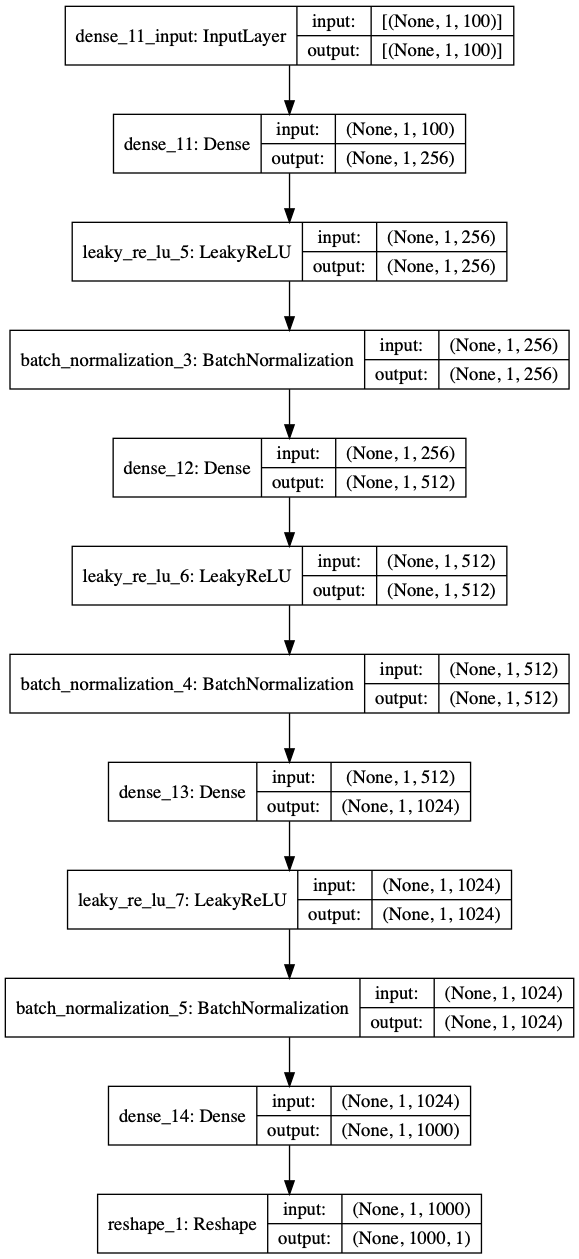

In [9]:
plot_model(generator, to_file='test_keras_plot_model.png', show_shapes=True)
Image('test_keras_plot_model.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


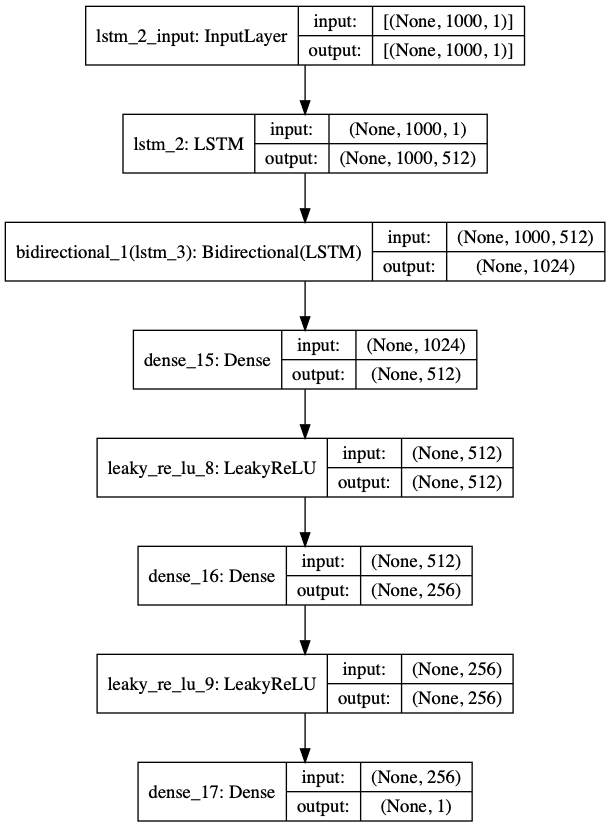

In [10]:
plot_model(discriminator, to_file='test_keras_plot_model_1.png', show_shapes=True)
Image('test_keras_plot_model_1.png')